In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import code enforcement violations

In [3]:
violations = pd.read_csv('C:/Data/AnalyzeBoston/data/cepviolations.csv', dtype=object)

In [4]:
# Convert status to date/time

In [5]:
violations['Status_DTTM'] = pd.to_datetime(violations['Status_DTTM'], errors='coerce')

In [6]:
# Explore the variety of records by viewing descriptions

In [7]:
violations.Description.unique()

array(['Failure to Obtain Permit', 'Unsafe Structure',
       'Improper storage trash: res', 'Improper storage trash: com',
       'Overgrown Weeds On Property', 'Graffiti on building- 2',
       'Overfilling of barrel/dumpster', 'Occupying City prop wo permit',
       'Smoke Alarms', 'Unregistered motor vehicles- 2',
       'Illegal dumping < 1 cubic yd', 'Unregistered motor vehicles-1',
       'Maintenance', 'illegal parking prop owner 2',
       'Door operations-Egress doors', 'illegal parking prop owner 1',
       'Right of Entry', 'Shopping Cart - 1', 'Graffiti on building- 1',
       'Failure clean sidewalk com', 'Maint a dumpster wopermit',
       'No use of premises permit:', 'Illegal Vending',
       'Maintenance of Exterior', 'No Number On A Building',
       'Large building recycling- 1', 'Failure clear sidewalk - snow',
       'Non-Emergency Auto Repair', 'Failure clear sidewalk - snow:',
       'Removal snow private property', 'Trash illegally dump container',
       'Remo

In [8]:
# Find violations that include variations of "trash", "dump" or "garbage" in the description
# Create an array of violation codes that correspond to such items

In [9]:
garbagecodes = violations[(violations['Description'].str.contains('garbage')) |
                          (violations['Description'].str.contains('trash')) | 
                          (violations['Description'].str.contains('Garbage')) |
                          (violations['Description'].str.contains('Trash')) |
                          (violations['Description'].str.contains('dumping')) |
                          (violations['Description'].str.contains('Dumping'))].Code.unique()

In [10]:
# Save the items from the array to a blank list

In [11]:
garbagecodelist = []
for item in garbagecodes:
    garbagecodelist.append(item)

In [12]:
# Remove several codes from the list, since they probably don't pertain to moving activity
# Improper storage trash: com (2)
# Illegal dumping park (10a)
# Illegal dumping Const debris (12)
# Illegal dumping: Haz Waste (13)
# Illegal Dumping (vehicle) (36)

In [13]:
garbagecodelist.remove('2')
garbagecodelist.remove('10a')
garbagecodelist.remove('12')
garbagecodelist.remove('13')
garbagecodelist.remove('36')

In [14]:
# Create subset of violations that pertain to garbage

In [15]:
garbage = violations[violations['Code'].isin(garbagecodelist)]

In [16]:
# Create subset of garbage violations recorded during move-in week
# Save to CSV for mapping later

In [17]:
garbagemoveinweek = garbage[(garbage['Status_DTTM'] >= pd.datetime(2016, 8, 29)) &
                (garbage['Status_DTTM'] < pd.datetime(2016, 9, 5))]

In [18]:
garbagemoveinweek.to_csv('C:/Data/AnalyzeBoston/data/cepviolations_garbage_moveinweek_2016.csv', index=False)

In [19]:
# Plot garbage-related violations in 2016 by week

In [20]:
garbage2016 = garbage[garbage['Status_DTTM'].dt.year == 2016]

In [21]:
garbage2016 = garbage2016.set_index('Status_DTTM')

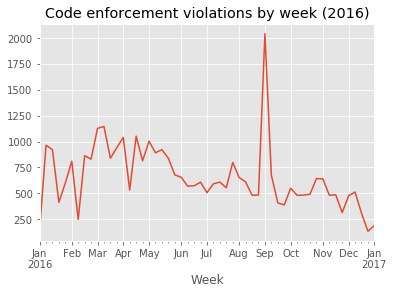

In [22]:
ax = garbage2016.resample('W').size().plot(title="Code enforcement violations by week (2016)")
ax.set_xlabel('Week')